In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt


def format_polynom(polynom_str):
    polynom_str = re.sub('--', '+', polynom_str)
    polynom_str = re.sub(r'\+-', '-', polynom_str)
    polynom_str = re.sub('-', ' - ', polynom_str)
    polynom_str = re.sub(r'\+', ' + ', polynom_str)

    return polynom_str

def lagrange(f, x, test_point):
    y = [f(t) for t in x]
    assert len(x) == len(y)

    polynom_str = 'L(x) ='
    polynom_test_value = 0

    for i in range(len(x)):
        cur_enum_str = ''
        cur_enum_test = 1
        cur_denom = 1

        for j in range(len(x)):
            if i == j:
                continue

            cur_enum_str += f'(x-{x[j]:.2f})'
            cur_enum_test *= (test_point[0] - x[j])
            cur_denom *= (x[i] - x[j])

        polynom_str += f'+{(y[i] / cur_denom):.2f}' + cur_enum_str
        polynom_test_value += y[i] * cur_enum_test / cur_denom

    return format_polynom(polynom_str), abs(polynom_test_value - test_point[1])

def lagrangeTest(f, x, test_point):
    y = [f(t) for t in x]
    assert len(x) == len(y)

    polynom_str = 'L(x) ='
    polynom_test_value = 0

    for i in range(len(x)):
        cur_enum_str = ''
        cur_enum_test = 1
        cur_denom = 1

        for j in range(len(x)):
            if i == j:
                continue

            cur_enum_str += f'(x-{x[j]:.2f})'
            cur_enum_test *= (test_point - x[j])
            cur_denom *= (x[i] - x[j])

        polynom_str += f'+{(y[i] / cur_denom):.2f}' + cur_enum_str
        polynom_test_value += y[i] * cur_enum_test / cur_denom

    return polynom_test_value

def newton(f, x, test_point):
    y = [f(t) for t in x]
    assert len(x) == len(y)

    n = len(x)
    coefs = [y[i] for i in range(n)]

    for i in range(1, n):
        for j in range(n - 1, i - 1, -1):
            coefs[j] = float(coefs[j] - coefs[j - 1]) / float(x[j] - x[j - i])

    polynom_str = 'P(x) = '
    polynom_test_value = 0

    cur_multipliers_str = ''
    cur_multipliers = 1

    for i in range(n):
        polynom_test_value += cur_multipliers * coefs[i]
        
        if i == 0:
            polynom_str += f'{coefs[i]:.2f}'
        else:
            polynom_str += '+' + cur_multipliers_str + '*' + f'{coefs[i]:.2f}'

        cur_multipliers *= (test_point[0] - x[i])
        cur_multipliers_str += f'(x-{x[i]:.2f})'
    return format_polynom(polynom_str), abs(polynom_test_value - test_point[1])

def newtonTest(f, x, test_point):
    y = [f(t) for t in x]
    assert len(x) == len(y)

    n = len(x)
    coefs = [y[i] for i in range(n)]

    for i in range(1, n):
        for j in range(n - 1, i - 1, -1):
            coefs[j] = float(coefs[j] - coefs[j - 1]) / float(x[j] - x[j - i])

    polynom_str = 'P(x) = '
    polynom_test_value = 0

    cur_multipliers_str = ''
    cur_multipliers = 1

    for i in range(n):
        polynom_test_value += cur_multipliers * coefs[i]
        
        if i == 0:
            polynom_str += f'{coefs[i]:.2f}'
        else:
            polynom_str += '+' + cur_multipliers_str + '*' + f'{coefs[i]:.2f}'

        cur_multipliers *= (test_point - x[i])
        cur_multipliers_str += f'(x-{x[i]:.2f})'

    return polynom_test_value


x_a = np.array([-0.4, -0.1, 0.2, 0.5])
x_b = np.array([-0.4, 0.0, 0.2, 0.5])
x_ = 0.1

equation = lambda x: np.arccos(x)

polynomL1, errorL1 = lagrange(equation, x_a, (x_, equation(x_)))
polynomL2, errorL2 = lagrange(equation, x_b, (x_, equation(x_)))
polynomN1, errorN1 = newton(equation, x_a, (x_, equation(x_)))
polynomN2, errorN2 = newton(equation, x_b, (x_, equation(x_)))

print(f"Lagrange interpolation:\n")
print(f"Points A polynom: {polynomL1}\n")
print(f"Error in X*: {errorL1}\n")
print(f"Points B polynom: {polynomL2}\n")
print(f"Error in X*: {errorL2}\n\n")
print(f"Newton interpolation:\n")
print(f"Points A polynom: {polynomN1}\n")
print(f"Error in X*: {errorN1}\n")
print(f"Points B polynom: {polynomN2}\n")
print(f"Error in X*: {errorN2}\n")
    


Lagrange interpolation:

Points A polynom: L(x) = - 12.24(x + 0.10)(x - 0.20)(x - 0.50) + 30.94(x + 0.40)(x - 0.20)(x - 0.50) - 25.36(x + 0.40)(x + 0.10)(x - 0.50) + 6.46(x + 0.40)(x + 0.10)(x - 0.20)

Error in X*: 0.00011154315104744406

Points B polynom: L(x) = - 9.18(x - 0.00)(x - 0.20)(x - 0.50) + 39.27(x + 0.40)(x - 0.20)(x - 0.50) - 38.04(x + 0.40)(x - 0.00)(x - 0.50) + 7.76(x + 0.40)(x - 0.00)(x - 0.20)

Error in X*: 7.377452117429684e-05


Newton interpolation:

Points A polynom: P(x) = 1.98 + (x + 0.40)* - 1.04 + (x + 0.40)(x + 0.10)*0.05 + (x + 0.40)(x + 0.10)(x - 0.20)* - 0.19

Error in X*: 0.0001115431510476661

Points B polynom: P(x) = 1.98 + (x + 0.40)* - 1.03 + (x + 0.40)(x - 0.00)*0.04 + (x + 0.40)(x - 0.00)(x - 0.20)* - 0.19

Error in X*: 7.377452117429684e-05



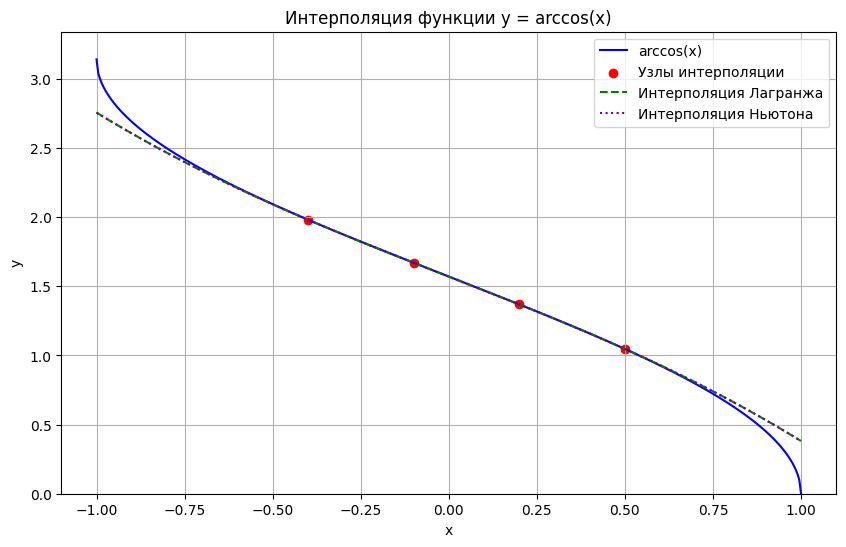

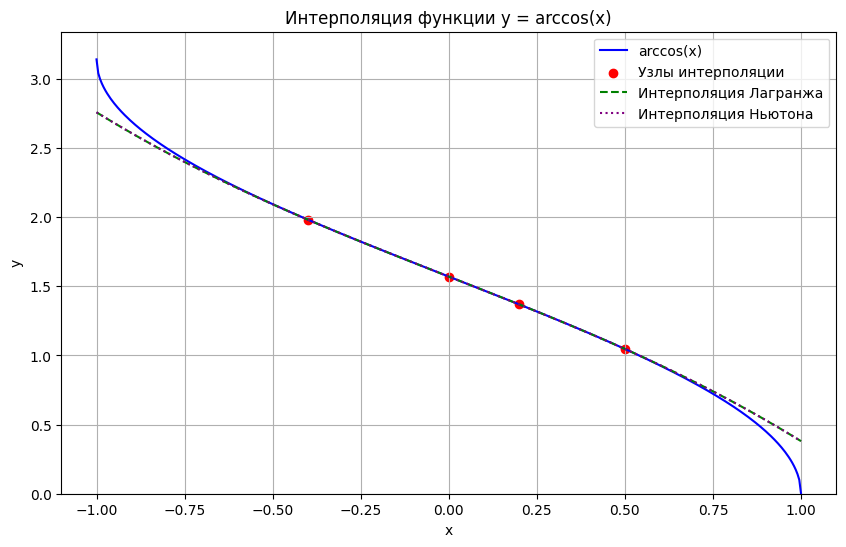

In [78]:
def test(x_a, equation):
    x1 = np.linspace(-1, 1, 400)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(x1, [equation(i) for i in x1], label="arccos(x)", color='blue')
    
    plt.scatter(x_a, [equation(i) for i in x_a], color='red', label='Узлы интерполяции')
    plt.plot(x1, [lagrangeTest(equation, x_a, i) for i in x1], label='Интерполяция Лагранжа', linestyle='--', color='green')
    plt.plot(x1, [newtonTest(equation, x_a, i) for i in x1], label='Интерполяция Ньютона', linestyle=':', color='purple')
    
    plt.title('Интерполяция функции y = arccos(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, np.pi + 0.2)
    plt.show()
    

test(x_a, equation)

test(x_b, equation)